In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import math as math

In [2]:
questURL = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry\
           &fmt=JSON'
Quest = requests.get(questURL).json()
Quest

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:24 00:13:26.663',
  'Expression': 'covid 19',
  'NStudiesAvail': 346767,
  'NStudiesFound': 2874,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationCity',
   'LocationCountry'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04395482'],
    'BriefTitle': ['Lung CT Scan Analysis of SARS-CoV2 Induced Lung Injury'],
    'StatusVerifiedDate': ['May 2020'],
    'CompletionDate': ['October 15, 2020'],
    'OrgFullName': ['University of Milano Bicocca'],
    'OrgClass': ['OTHER'],
    'Keyword': ['Lung injury', 'sars-covid-2', 'coronavirus infection'],
    'LocationCity': ['Bergamo',
     'Bergamo',
     'Ferrara',
     'Lecco',
     'Melzo',
     'Monza',
     'Rimini',
     'San Marino'],
    'LocationCountry': ['Italy',
     'Italy',
     'Italy',
     'Italy',
     'Ita

In [3]:
limit1 = Quest['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit1

2874

In [4]:
# Query the api in packets of 1000 then merge into a single dataframe

tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry\
           &fmt=JSON'   
tempL1 = requests.get(tempURL1).json()

tempURL2 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk=2000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

tempURL3 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=2001\
           &max_rnk={limit1}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry\
           &fmt=JSON'
tempL3 = requests.get(tempURL3).json()

Q1_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q1_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']
Q1_tempL3 = tempL3['StudyFieldsResponse']['StudyFields']

In [5]:
Q1_tempDF1 = pd.DataFrame(Q1_tempL1)
Q1_tempDF2 = pd.DataFrame(Q1_tempL2)
Q1_tempDF3 = pd.DataFrame(Q1_tempL3)

In [6]:
#returns single list of col values from all 3 temp DF's 

def unListItems(col):
    lst_1 = [' ']*len(Q1_tempDF1[col])  # create empty list the length of 'Q1_tempDF1[col]'
    i = 0
    while i < len(Q1_tempDF1[col]):
        if len(Q1_tempDF1[col][i])==0:
            lst_1[i] = None
        else:
            lst_1[i] = Q1_tempDF1[col][i][0]
        i += 1
    lst_2 = [' ']*len(Q1_tempDF2[col])
    i = 0
    while i < len(Q1_tempDF2[col]):
        if len(Q1_tempDF2[col][i])==0:
            lst_2[i] = None
        else:
            lst_2[i] = Q1_tempDF2[col][i][0]
        i += 1      
    lst_3 = [' ']*len(Q1_tempDF3[col])
    i = 0
    while i < len(Q1_tempDF3[col]):
        if len(Q1_tempDF3[col][i])==0:
            lst_3[i] = None
        else:
            lst_3[i] = Q1_tempDF3[col][i][0]
        i += 1
    LIST = lst_1 + lst_2 + lst_3
    return LIST

In [7]:
#retrive unListed Items, populate Query1 DataFrame with query results from id, title, and date keys

ID = unListItems('NCTId')
Title = unListItems('BriefTitle')
VerifiedDate = unListItems('StatusVerifiedDate')
CompletionDate = unListItems('CompletionDate')
OrgFullName = unListItems('OrgFullName')
OrgClass = unListItems('OrgClass')
QueryType = ['covid 19']*len(ID)
Country = unListItems('LocationCountry')
City = unListItems('LocationCity')


DF_Q1 = pd.DataFrame()
DF_Q1.insert(0, 'ID', ID)
DF_Q1.insert(1, 'Title', Title)
DF_Q1.insert(2, 'Date Verified', VerifiedDate)
DF_Q1.insert(3, 'Completion Date', CompletionDate)
DF_Q1.insert(4, 'Organization', OrgFullName)
DF_Q1.insert(5, 'Organization Class', OrgClass)
DF_Q1.insert(6, 'Country', Country)
DF_Q1.insert(7, 'City', City)

In [8]:
groupID = DF_Q1.groupby('ID')

df = pd.DataFrame(groupID.count())

df = df.loc[df['Title']>1]

dupeList = []
for i in df.index:
    dupeList.append(i)
print(dupeList)

[]


In [9]:
query = 'coronavirus'
quest2URL = f'http://ClinicalTrials.gov/api/query/study_fields?expr={query}\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry\
           &fmt=JSON'
Quest2 = requests.get(quest2URL).json()
Quest2

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:24 00:13:26.663',
  'Expression': 'coronavirus',
  'NStudiesAvail': 346767,
  'NStudiesFound': 1458,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationCity',
   'LocationCountry'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04279795'],
    'BriefTitle': ['Detection of 2019 Novel Coronavirus in Multiple Organ System and Its Relationship With Clinical Manifestations'],
    'StatusVerifiedDate': ['February 2020'],
    'CompletionDate': ['February 28, 2021'],
    'OrgFullName': ['Third Affiliated Hospital, Sun Yat-Sen University'],
    'OrgClass': ['OTHER'],
    'Keyword': ['2019 Novel Coronavirus'],
    'LocationCity': ['Guangzhou'],
    'LocationCountry': ['China']}]}}

In [10]:
limit2 = Quest2['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit2 

1458

In [11]:
# Query the api in packets of 1000 then merge into a single dataframe

tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry\
           &fmt=JSON'   
tempL1 = requests.get(tempURL1).json()

tempURL2 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk={limit2}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

Q2_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q2_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']

In [12]:
#Create DF's from our list objects
Q2_tempDF1 = pd.DataFrame(Q2_tempL1)
Q2_tempDF2 = pd.DataFrame(Q2_tempL2)

In [13]:
#returns single list of col values from all 3 temp DF's 

def unListItemsQ2(col):
    lst_1 = [' ']*len(Q2_tempDF1[col])  # create empty list the length of 'Q1_tempDF1[col]'
    i = 0
    while i < len(Q2_tempDF1[col]):
        if len(Q2_tempDF1[col][i])==0:
            lst_1[i] = None
        else:
            lst_1[i] = Q2_tempDF1[col][i][0]
        i += 1
    lst_2 = [' ']*len(Q2_tempDF2[col])
    i = 0
    while i < len(Q2_tempDF2[col]):
        if len(Q2_tempDF2[col][i])==0:
            lst_2[i] = None
        else:
            lst_2[i] = Q2_tempDF2[col][i][0]
        i += 1      
    LIST = lst_1 + lst_2
    return LIST

In [14]:
#retrive unListed Items, populate Query1 DataFrame with query results from id, title, and date keys

ID = unListItemsQ2('NCTId')
Title = unListItemsQ2('BriefTitle')
VerifiedDate = unListItemsQ2('StatusVerifiedDate')
CompletionDate = unListItemsQ2('CompletionDate')
OrgFullName = unListItemsQ2('OrgFullName')
OrgClass = unListItemsQ2('OrgClass')
QueryType = ['coronavirus']*len(ID)
Country = unListItemsQ2('LocationCountry')
City = unListItemsQ2('LocationCity')

DF_Q2 = pd.DataFrame()
DF_Q2.insert(0, 'ID', ID)
DF_Q2.insert(1, 'Title', Title)
DF_Q2.insert(2, 'Date Verified', VerifiedDate)
DF_Q2.insert(3, 'Completion Date', CompletionDate)
DF_Q2.insert(4, 'Organization', OrgFullName)
DF_Q2.insert(5, 'Organization Class', OrgClass)
DF_Q2.insert(6, 'Country', Country)
DF_Q2.insert(7, 'City', City)

In [15]:
#Create dataframe with data from both queries, drop duplacates, and set index to 'ID'

DF_QQ = pd.concat([DF_Q1,DF_Q2], ignore_index=True)
DF_QQ = DF_QQ.drop_duplicates()
DF_QQ.set_index('ID', inplace=True)
DF_QQ

,Title,Date Verified,Completion Date,Organization,Organization Class,Country,City
ID,,,,,,,
NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"October 15, 2020",University of Milano Bicocca,OTHER,Italy,Bergamo
NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,May 2021,Centre Hospitalier Régional d'Orléans,OTHER,France,Orléans
NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,June 2022,Meharry Medical College,OTHER,United States,Nashville
NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2021",University of Milano Bicocca,OTHER,Italy,Monza
NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"September 30, 2020",University of Milano Bicocca,OTHER,Italy,Monza
...,...,...,...,...,...,...,...
NCT03728257,Lung Transplant G0 (LTGO): Improving Self-Mana...,June 2020,"April 8, 2022",University of Pittsburgh,OTHER,United States,Pittsburgh
NCT03823469,Evaluating the Impact of a Culinary Coaching T...,May 2020,February 2022,Spaulding Rehabilitation Hospital,OTHER,United States,Charlestown
NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,June 2020,"June 30, 2023",University of Alabama at Birmingham,OTHER,Zambia,Lusaka


In [16]:
#Create a dataframe with keywords, BriefTitle and trial ID

Keywords1 = Q1_tempDF1[['NCTId', 'BriefTitle', 'Keyword']]
Keywords2 = Q1_tempDF2[['NCTId', 'BriefTitle', 'Keyword']]
Keywords3 = Q1_tempDF3[['NCTId', 'BriefTitle', 'Keyword']]
Keywords4 = Q2_tempDF1[['NCTId', 'BriefTitle', 'Keyword']]
Keywords5 = Q2_tempDF1[['NCTId', 'BriefTitle', 'Keyword']]

Keywords = pd.concat([Keywords1,Keywords2,Keywords3,Keywords4,Keywords5], ignore_index=True) 
Keywords.set_index('NCTId')


,BriefTitle,Keyword
NCTId,,
[NCT04395482],[Lung CT Scan Analysis of SARS-CoV2 Induced Lu...,"[Lung injury, sars-covid-2, coronavirus infect..."
[NCT04395924],[Maternal-foetal Transmission of SARS-Cov-2],"[Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolo..."
[NCT04476940],[COVID-19 Breastfeeding Guideline for African-...,"[COVID-19, Exclusive Breastfeeding, Breastfeed..."
[NCT04412265],[Frailty in Elderly Patients With COVID-19],"[Coronavirus, sars-covid-2, coronavirus infect..."
[NCT04427332],[Smell and Taste Disorders in COVID-19 Patients],"[Coronavirus, sars-covid-2, coronavirus infect..."
...,...,...
[NCT04316884],[Mechanisms for Organ Dysfunction in Covid-19],[]
[NCT04344197],[Surgery During Covid-19: The Role of Asymptom...,[]
[NCT04383886],[Evaluation of Emergency Department (ED) Staff...,"[COVID-19 pandemic, level of stress, emergency..."


In [17]:
id_list = []
for l in Keywords['NCTId']:
    l = l[0]
    id_list.append(l)
Keywords.insert(3, 'ID', id_list)

In [18]:
Keywords.drop('NCTId', axis=1, inplace=True)

In [19]:
Keywords.set_index('ID', inplace=True)

In [20]:
Keywords

,BriefTitle,Keyword
ID,,
NCT04395482,[Lung CT Scan Analysis of SARS-CoV2 Induced Lu...,"[Lung injury, sars-covid-2, coronavirus infect..."
NCT04395924,[Maternal-foetal Transmission of SARS-Cov-2],"[Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolo..."
NCT04476940,[COVID-19 Breastfeeding Guideline for African-...,"[COVID-19, Exclusive Breastfeeding, Breastfeed..."
NCT04412265,[Frailty in Elderly Patients With COVID-19],"[Coronavirus, sars-covid-2, coronavirus infect..."
NCT04427332,[Smell and Taste Disorders in COVID-19 Patients],"[Coronavirus, sars-covid-2, coronavirus infect..."
...,...,...
NCT04316884,[Mechanisms for Organ Dysfunction in Covid-19],[]
NCT04344197,[Surgery During Covid-19: The Role of Asymptom...,[]
NCT04383886,[Evaluation of Emergency Department (ED) Staff...,"[COVID-19 pandemic, level of stress, emergency..."


In [21]:
dups = Keywords.pivot_table(index=['ID'], aggfunc='size')
dups_list = []
for i, d in enumerate(dups):
    if d > 1:
        dups_list.append(dups.index[i])

In [22]:
Keywords = Keywords.reset_index()

In [23]:
dupLL = []
for d in dups_list:
    dupf = Keywords.loc[Keywords['ID']==d]
    l = len(dupf.index)
    dupL = ['']*l
    for i, x in enumerate(dupL):
        dupL[i] = dupf.index[i]
    dupLL.append(dupL)

for x in dupLL:
    Keywords.drop(x[1:], axis=0, inplace=True)
        

In [24]:
#Clean Up
Keywords = Keywords.reset_index()

In [25]:
#Remove empty Keyword fields
for i, k in enumerate(Keywords['Keyword']):
    if len(k) == 0:
        Keywords.drop(i, axis=0, inplace=True)

In [26]:
#Clean Up
Keywords = Keywords.reset_index()

In [27]:
Keywords

,level_0,index,ID,BriefTitle,Keyword
0,0,0,NCT04395482,[Lung CT Scan Analysis of SARS-CoV2 Induced Lu...,"[Lung injury, sars-covid-2, coronavirus infect..."
1,1,1,NCT04395924,[Maternal-foetal Transmission of SARS-Cov-2],"[Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolo..."
2,2,2,NCT04476940,[COVID-19 Breastfeeding Guideline for African-...,"[COVID-19, Exclusive Breastfeeding, Breastfeed..."
3,3,3,NCT04412265,[Frailty in Elderly Patients With COVID-19],"[Coronavirus, sars-covid-2, coronavirus infect..."
4,4,4,NCT04427332,[Smell and Taste Disorders in COVID-19 Patients],"[Coronavirus, sars-covid-2, coronavirus infect..."
...,...,...,...,...,...
1660,2867,2867,NCT03983733,[PREDICT 2: Personalized Responses to Dietary ...,"[Gut microbiome, Personalised Nutrition, Metab..."
1661,2868,2868,NCT03261050,[Target Engagement of a Novel Dissonance-Based...,"[Eating disorder, Counter attitudinal therapy,..."
1662,2870,2870,NCT03823469,[Evaluating the Impact of a Culinary Coaching ...,"[Home cooking, Telemedicine, Nutrition, Health..."
1663,2871,2871,NCT04429061,[Reaching 90 90 90 in Adolescents in Zambia: U...,"[Adolescents, Zambia, Football]"


In [28]:
all_words = pd.DataFrame()
wordsList = []
for k in Keywords['Keyword']:
    for word in k:
        new_word = word.lower()
        new_word = new_word.replace('-', ' ')
        if new_word == 'covid19':
            new_word = 'covid 19'
        elif new_word == 'coronavirus disease 2019':
            new_word = 'covid 19'
        elif new_word == 'sars cov2':
            new_word = 'sars cov 2'
        elif new_word == 'corona virus':
            new_word = 'coronavirus'
        elif new_word == 'icu':
            new_word = 'intensive care unit'
        elif new_word == 'covid 19 pneumonia':
            wordsList.append('covid 19')
            new_word = 'pneumonia'

        wordsList.append(new_word)
        
all_words.insert(0, 'Word', wordsList)

wordsCount = all_words.pivot_table(index=['Word'], aggfunc='size')
wordsCount = wordsCount.sort_values(ascending=False)
wordCountDF = pd.DataFrame(wordsCount)
wordCountDF.rename(columns={0:'Count'}, inplace=True)
wordCountDF.head(50)

,Count
Word,
covid 19,945
sars cov 2,371
coronavirus,218
pneumonia,78
hydroxychloroquine,72
covid,69
ards,65
acute respiratory distress syndrome,40
convalescent plasma,38


In [29]:
# Color palette for plots
colors = ['lightcoral', 'paleturquoise', 'palegoldenrod', 'plum', 'mediumaquamarine', 'sandybrown', 'mediumspringgreen', 'lightslategrey', 'darkorange', 'palevioletred']

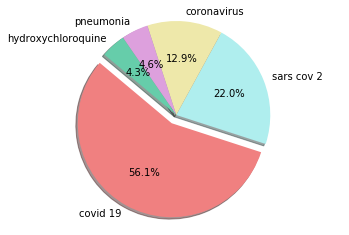

In [30]:
# Plot the top five keywords by frequency
l = 5
explode = [0]*l
explode[0] = 0.1
plt.pie(wordCountDF['Count'][:l], labels=wordCountDF.index[:l], colors = colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

In [31]:
# Ok, a lot of names for this novel virus, but we're more interested in other key terms
#Drop covid-19 and related words from DF
wordCountDF.drop(['covid 19', 'sars cov 2', 'coronavirus', 'covid'], inplace=True)

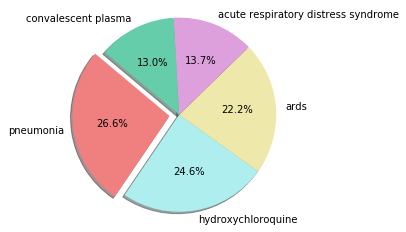

In [32]:
#Ok, now display the top 5 keywords by frequency
l = 5
explode = [0]*l
explode[0] = 0.1
plt.pie(wordCountDF['Count'][:l], labels=wordCountDF.index[:l], colors = colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

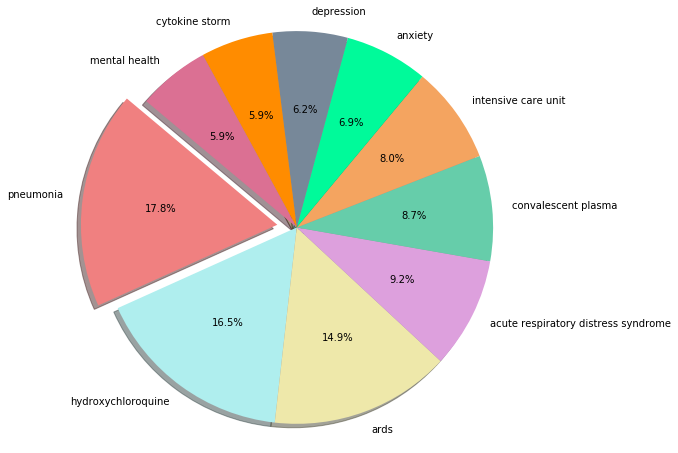

In [33]:
# Top 10
l = 10
explode = [0]*l
explode[0] = 0.1
plt.pie(wordCountDF['Count'][:l], labels=wordCountDF.index[:l], colors = colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.gcf().set_size_inches(8, 8)
plt.show()

##### NOTE: pie plots are measured in a frequency distribution relative only to terms shown in the plot
##### These values are not true for a given terms frequency relative to the entire keyword distribution

##### For a more true representation we will plot a bar chart

In [34]:
#Pareto Chart of top 15 keywords
l = 15
c_list = wordCountDF['Count'].cumsum()
c_list = c_list/wordCountDF['Count'].sum()*100
c_list

Word
pneumonia                                     1.551621
hydroxychloroquine                            2.983887
ards                                          4.276905
acute respiratory distress syndrome           5.072608
convalescent plasma                           5.828526
                                               ...    
non smoker                                   99.920430
non severe covid 19                          99.940322
non pharmacological interventions (npis)     99.960215
non pharmacological interventions            99.980107
1,25 dihydroxyvitamin d3                    100.000000
Name: Count, Length: 2788, dtype: float64

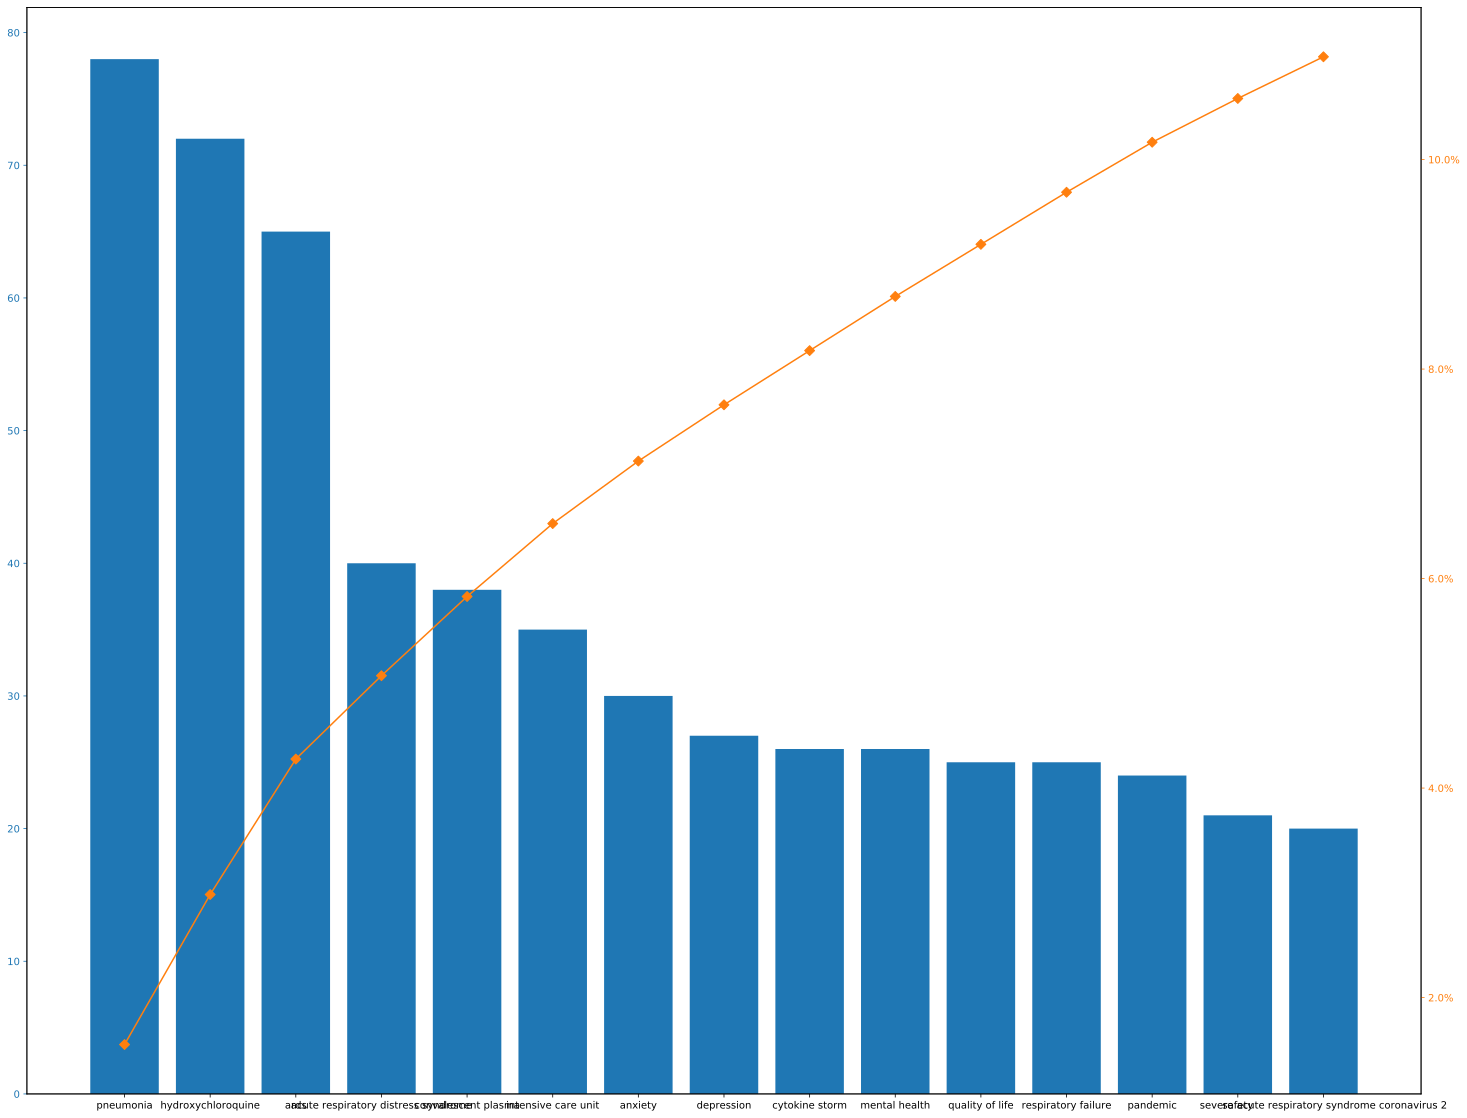

In [50]:
l = 15
fig, ax = plt.subplots()
ax.bar(wordCountDF.index[:l], wordCountDF['Count'][:l], color="C0")
ax2 = ax.twinx()
ax2.plot(wordCountDF.index[:l], c_list[:l], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(tk.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.gcf().set_size_inches(25, 20)
%config InlineBackend.figure_format = 'svg'
plt.show()